In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK resources (run this only once)
nltk.download('punkt')
nltk.download('stopwords')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/financial-news-and-stock-price-integration-dataset/raw_analyst_ratings.csv


In [2]:
df=pd.read_csv('/kaggle/input/financial-news-and-stock-price-integration-dataset/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Descriptive Statistics:

In [3]:
# Basic statistics for textual lengths (headline length)
df['headline_length'] = df['headline'].apply(lambda x: len(x))
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [4]:
# Count the number of articles per publisher
articles_per_publisher = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(articles_per_publisher)


Number of Articles per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [6]:
# Analyze publication dates to see trends over time
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract date components for analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


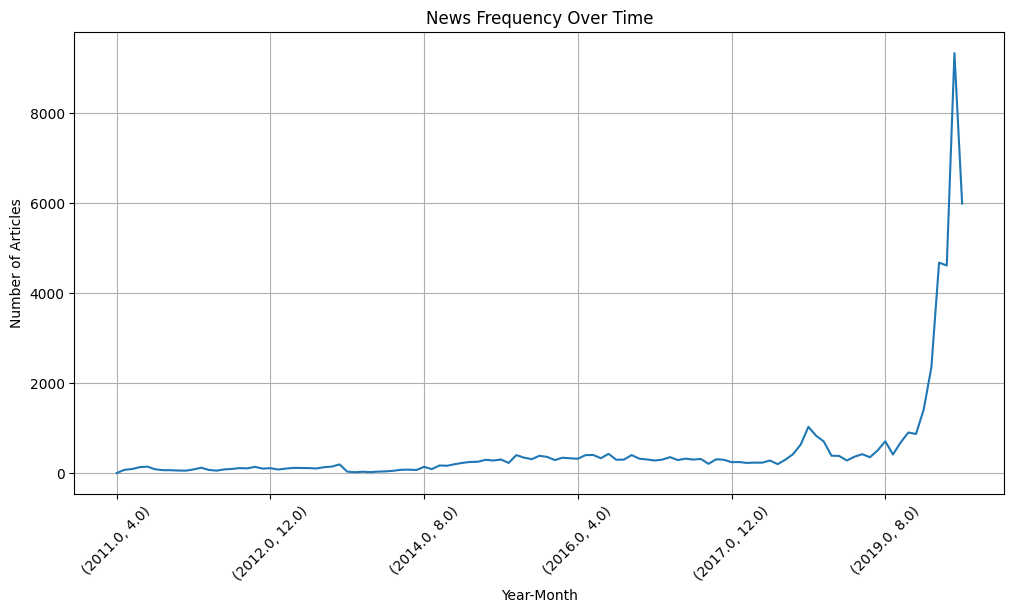

In [8]:
# Group by year and month to get news count
news_frequency = df.groupby(['year', 'month']).size()

# Plot
plt.figure(figsize=(12, 6))
news_frequency.plot(kind='line')
plt.title('News Frequency Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
# Perform sentiment analysis on headlines
def analyze_sentiment(headline):
    blob = TextBlob(headline)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Add a new column for sentiment analysis
df['sentiment'] = df['headline'].apply(analyze_sentiment)

# Display sentiment distribution
sentiment_distribution = df['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_distribution)

Sentiment Distribution:
sentiment
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64


In [11]:
df.set_index('date', inplace=True)

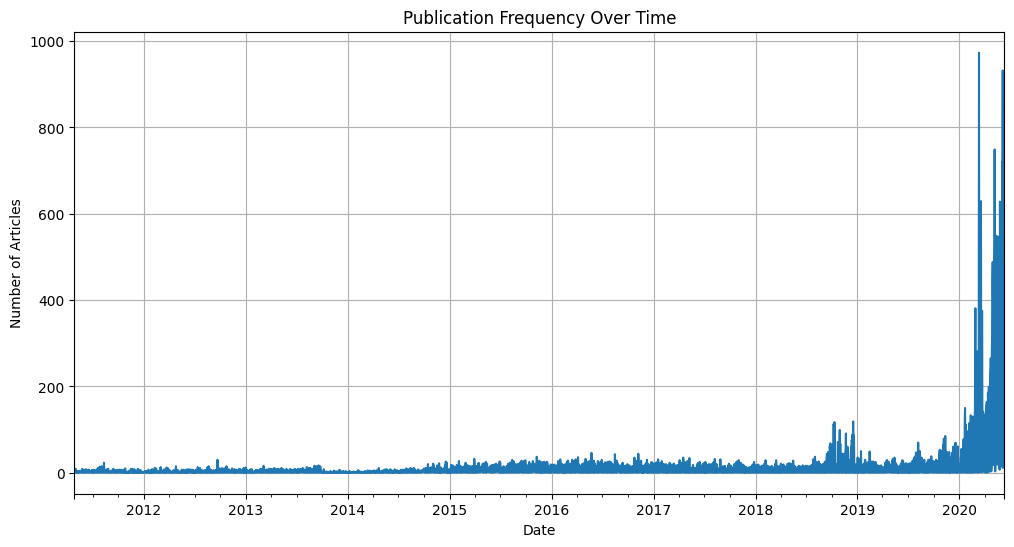

In [12]:
# Resample the data to get the count of articles per day
article_count_per_day = df.resample('D').size()

# Plot the publication frequency over time
plt.figure(figsize=(12, 6))
article_count_per_day.plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

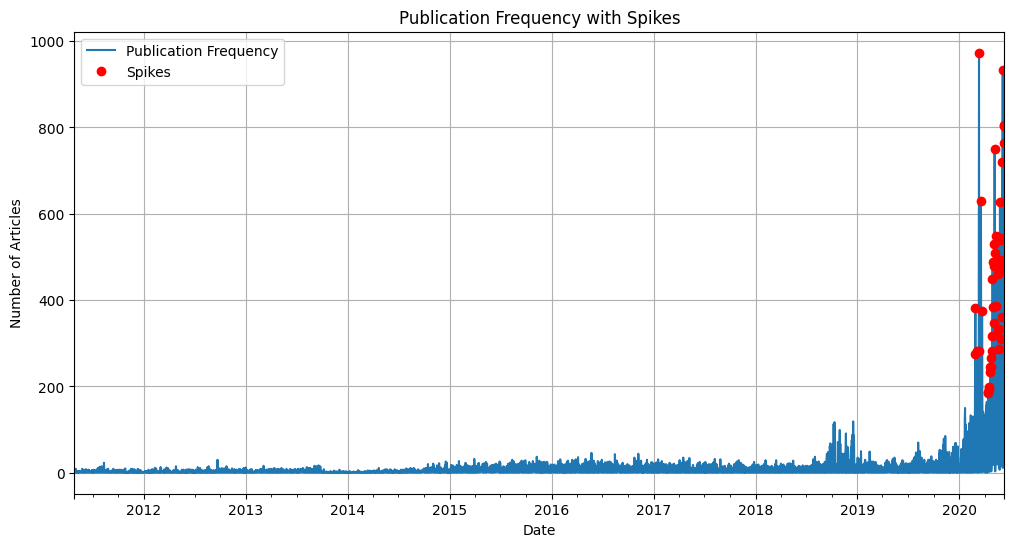

In [13]:
# Identify spikes in publication frequency
# You can define a threshold for spikes based on your dataset
threshold = 3 * article_count_per_day.std()  # Adjust the multiplier based on your dataset
spikes = article_count_per_day[article_count_per_day > threshold]

# Plot the spikes
plt.figure(figsize=(12, 6))
article_count_per_day.plot()
spikes.plot(style='ro')
plt.title('Publication Frequency with Spikes')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.legend(['Publication Frequency', 'Spikes'])
plt.show()


In [14]:
# Identify the dates of spikes
print("Dates of Spikes:")
print(spikes.index)


Dates of Spikes:
DatetimeIndex(['2020-02-27 00:00:00-04:00', '2020-02-28 00:00:00-04:00',
               '2020-03-06 00:00:00-04:00', '2020-03-11 00:00:00-04:00',
               '2020-03-12 00:00:00-04:00', '2020-03-19 00:00:00-04:00',
               '2020-03-23 00:00:00-04:00', '2020-04-13 00:00:00-04:00',
               '2020-04-15 00:00:00-04:00', '2020-04-16 00:00:00-04:00',
               '2020-04-17 00:00:00-04:00', '2020-04-21 00:00:00-04:00',
               '2020-04-22 00:00:00-04:00', '2020-04-23 00:00:00-04:00',
               '2020-04-24 00:00:00-04:00', '2020-04-27 00:00:00-04:00',
               '2020-04-28 00:00:00-04:00', '2020-04-29 00:00:00-04:00',
               '2020-04-30 00:00:00-04:00', '2020-05-01 00:00:00-04:00',
               '2020-05-04 00:00:00-04:00', '2020-05-05 00:00:00-04:00',
               '2020-05-06 00:00:00-04:00', '2020-05-07 00:00:00-04:00',
               '2020-05-08 00:00:00-04:00', '2020-05-11 00:00:00-04:00',
               '2020-05-12 00:00:0

In [16]:
# Analyze publishing times to identify the most common time for news release
publishing_times = df.index.hour
common_publishing_time = publishing_times.value_counts().idxmax()
print("\nMost Common Publishing Time (hour):", common_publishing_time)


Most Common Publishing Time (hour): 10.0
